# Make simplified version of Coen et al 2014 data for ANN training

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys

from disp import set_plot

cc = np.concatenate

NTR = 276

TARG_BHV = 'MTN'
TWDWS = [.03, 1, 60]
TARGS = [f'{TARG_BHV}_MN_{twdw}' for twdw in TWDWS]

In [2]:
# load songs
df_behav = pd.read_csv('data/simple/c_song_f_behav.csv')
df_behav

,ID,FRAME,T,Q,S,P,F,FFV,FFA,FLS,FRS,FMFV,FMLS
0,0,0,0.000000,1,0,0,0,0.231,0.0000,0.159,0.077,-0.058526,0.274257
1,0,1,0.033300,1,0,0,0,0.314,0.0385,0.025,0.044,0.100623,0.298490
2,0,2,0.066600,1,0,0,0,0.308,0.0025,0.029,0.011,0.147629,0.271865
3,0,3,0.099900,1,0,0,0,0.319,0.0020,0.016,0.016,0.091174,0.306112
4,0,4,0.133200,1,0,0,0,0.312,-0.0315,0.030,0.002,0.065871,0.306439
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978565,275,27100,902.430902,1,0,0,0,0.217,0.0280,0.029,0.058,-0.171418,0.136184
4978566,275,27101,902.464202,1,0,0,0,0.210,-0.1045,0.138,0.322,0.032522,0.249171
4978567,275,27102,902.497502,1,0,0,0,0.008,-0.0910,0.034,0.260,0.033202,0.010844
4978568,275,27103,902.530803,1,0,0,0,0.028,0.0695,0.010,0.090,0.012059,0.027177


In [3]:
# split big df into dfs for individual trials
df_trs = [df_behav[df_behav.ID == i] for i in range(NTR)]
df_behav = None

In [4]:
# load corresponding extended behavior files
fname_behav_xtds = [f'behav_xtd_tr_{ctr}.csv' for ctr in range(NTR)]
df_tr_xtds = [pd.read_csv(os.path.join('data/simple/behav_xtd', fname)) for fname in fname_behav_xtds]

In [5]:
df_tr_xtds[0]

,ID,FRAME,T,FFV_MN_0.03,FFV_MN_0.1,FFV_MN_0.5,FFV_MN_1,FFV_MN_10,FFV_MN_120,FFV_MN_1200,...,MTN_SD_1,MTN_SD_10,MTN_SD_120,MTN_SD_1200,MTN_SD_2,MTN_SD_30,MTN_SD_300,MTN_SD_5,MTN_SD_60,MTN_SD_600
0,0,0,0.000000,0.231,0.284333,0.262667,0.409033,0.139010,0.269578,0.057742,...,0.163590,0.650759,0.256793,0.231374,0.873116,0.406929,0.236707,0.869216,0.315902,0.231374
1,0,1,0.033300,0.314,0.313667,0.275600,0.407800,0.139383,0.269505,0.057736,...,0.166506,0.650785,0.256839,0.231386,0.874637,0.407006,0.236711,0.869900,0.315903,0.231386
2,0,2,0.066600,0.308,0.313000,0.290333,0.403667,0.139447,0.269395,0.057727,...,0.170687,0.650802,0.256871,0.231397,0.876223,0.407114,0.236717,0.870622,0.315974,0.231397
3,0,3,0.099900,0.319,0.295667,0.308333,0.405367,0.139467,0.269294,0.057719,...,0.169816,0.650837,0.256886,0.231408,0.877800,0.407166,0.236722,0.871337,0.316049,0.231408
4,0,4,0.133200,0.312,0.273667,0.329000,0.409567,0.139770,0.269209,0.057710,...,0.168724,0.650945,0.256886,0.231419,0.879378,0.407254,0.236728,0.872053,0.316137,0.231419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9858,0,9858,328.271728,0.108,0.142000,0.047867,0.023933,0.002393,0.000199,0.000020,...,0.023927,0.023927,0.023927,0.023927,0.023927,0.023927,0.023927,0.023927,0.023927,0.023927
9859,0,9859,328.305028,0.161,0.153333,0.040667,0.020333,0.002033,0.000169,0.000017,...,0.012421,0.012421,0.012421,0.012421,0.012421,0.012421,0.012421,0.012421,0.012421,0.012421
9860,0,9860,328.338328,0.157,0.149667,0.029933,0.014967,0.001497,0.000125,0.000012,...,0.006622,0.006622,0.006622,0.006622,0.006622,0.006622,0.006622,0.006622,0.006622,0.006622
9861,0,9861,328.371628,0.142,0.097333,0.019467,0.009733,0.000973,0.000081,0.000008,...,0.005153,0.005153,0.005153,0.005153,0.005153,0.005153,0.005153,0.005153,0.005153,0.005153


In [6]:
# merge simple and extended dfs to keep only ID, FRAME, T, song, and targs
df_tr_mergeds = []
for df_tr, df_tr_xtd in zip(df_trs, df_tr_xtds):
    
    i_s = np.array((df_tr['S']==1), dtype=float)
    i_p = np.array((df_tr['P']==1)|(df_tr['F']==1), dtype=float)
    
    data_tr = {'ID': np.array(df_tr['ID']), 'FRAME': df_tr['FRAME'], 'T': np.array(df_tr['T']), 'S': i_s, 'P': i_p}
    
    for targ in TARGS:
        data_tr[targ] = np.array(df_tr_xtd[targ])
    
    df_tr_merged = pd.DataFrame(columns=(['ID', 'FRAME', 'T', 'S', 'P'] + TARGS), data=data_tr)
    df_tr_mergeds.append(df_tr_merged)

In [7]:
df_full_merged = pd.concat(df_tr_mergeds)
df_full_merged.to_csv('data/simple/ann/c_song_f_behav_merged.csv')

# Reload and plot examples

In [8]:
df_behav_merged = pd.read_csv('data/simple/ann/c_song_f_behav_merged.csv')

In [9]:
df_tr_mergeds = [df_behav_merged[df_behav_merged.ID == i] for i in range(NTR)]
df_behav_merged = None

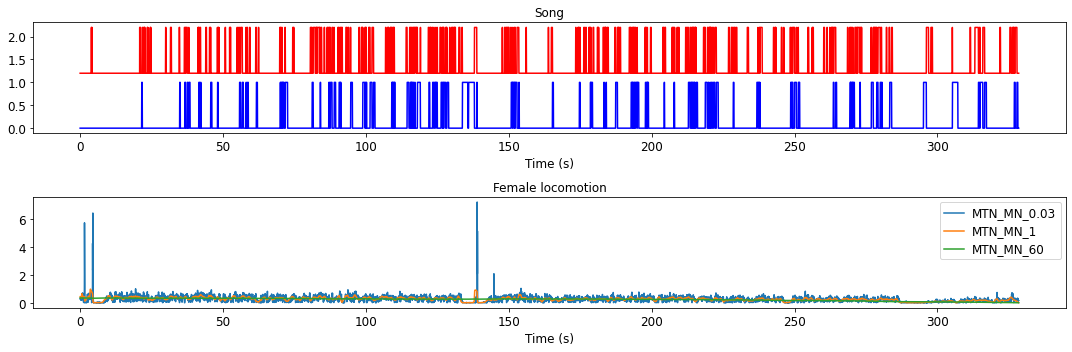

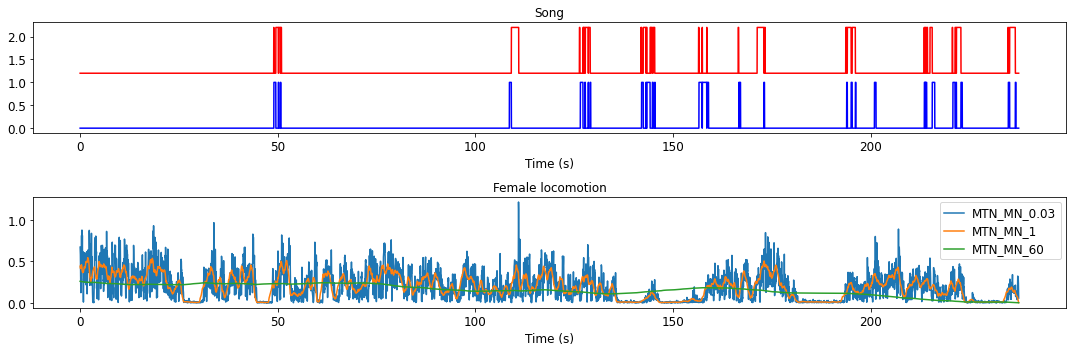

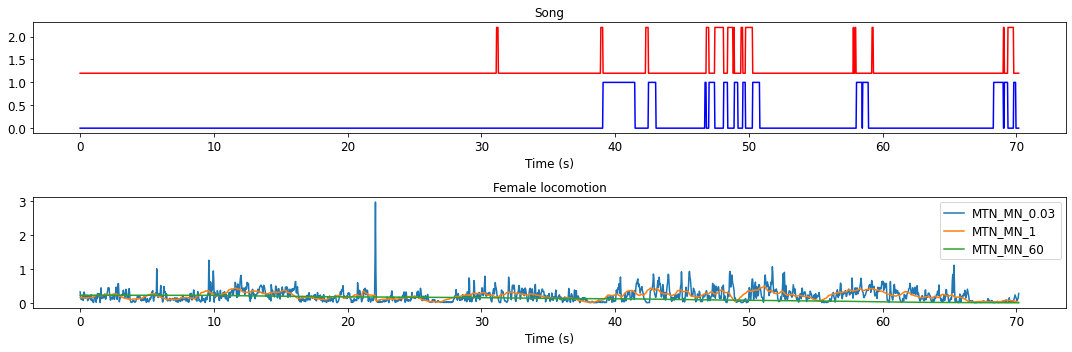

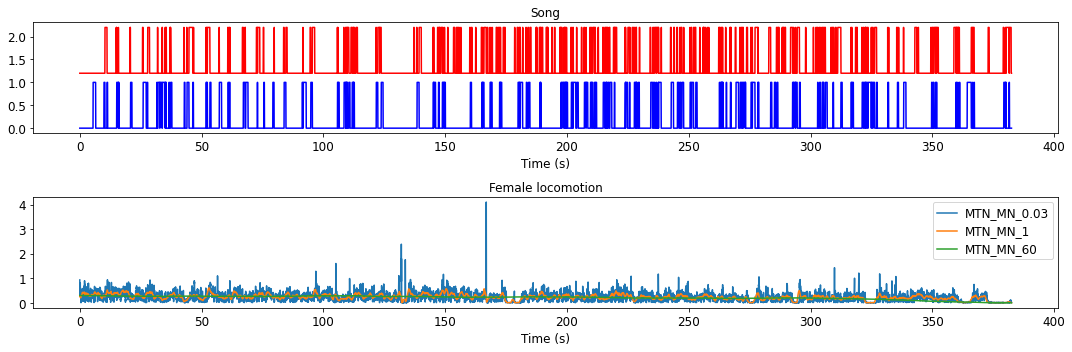

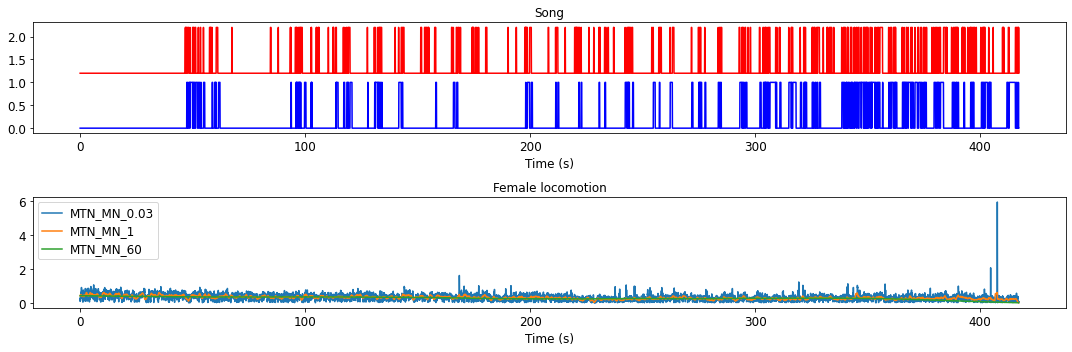

In [10]:
for ctr, df_tr_merged in enumerate(df_tr_mergeds[:5]):
    fig, axs = plt.subplots(2, 1, figsize=(15, 5), tight_layout=True)
    t = df_tr_merged['T']
    axs[0].plot(t, df_tr_merged['S'], c='b')
    axs[0].plot(t, df_tr_merged['P'] + 1.2, c='r')
    axs[0].set_title('Song')
    
    for targ in TARGS:
        axs[1].plot(t, df_tr_merged[targ])
        
    axs[1].set_title('Female locomotion')
    axs[1].legend(TARGS)
    
    for ax in axs:
        set_plot(ax, x_label='Time (s)', font_size=12)